# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install ucimlrepo


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


## Attention: currently commented out since there is better way as shown in the next code snippet.

In [2]:
# comment out the following lines


# change directory to the location of the dataset file CTG.xls

#%cd '/workspaces/Tensor-flow-project'

# Install xlrd package
#%pip install xlrd

# Replace 'your_dataset.csv' with the path to your actual dataset
#df = pd.read_excel('CTG.xls', sheet_name='Data')

# Number of samples
#num_samples = df.shape[0]

# Number of features
#num_features = df.shape[1]

# Display these dataset characteristics
#print(f"Number of samples: {num_samples}")
#print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
#print("Example data:")
#print(df.head())





## A more convenient option is to use the "fetch_ucirep" option.

In [3]:
import pandas as pd

from ucimlrepo import fetch_ucirepo

# fetch dataset
df = fetch_ucirepo(id=193)

# data (as pandas dataframes)
X = df.data.features
y = df.data.targets

# metadata
print(df.metadata)

# variable information
print(df.variables)

#print number of samples and features
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")


# Display the first few rows of the dataframe to show the structure
print(f"Example data: {X.head()}")




{'uci_id': 193, 'name': 'Cardiotocography', 'repository_url': 'https://archive.ics.uci.edu/dataset/193/cardiotocography', 'data_url': 'https://archive.ics.uci.edu/static/public/193/data.csv', 'abstract': 'The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 2126, 'num_features': 21, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['CLASS', 'NSP'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2000, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C51S4N', 'creators': ['D. Campos', 'J. Bernardes'], 'intro_paper': None, 'additional_info': {'summary': '2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [4]:
# Check for missing values
missing_values_X = X.isnull().sum()
missing_values_y = y.isnull().sum()
missing_values_X
missing_values_y


,0
CLASS,0
NSP,0


In [ ]:
# Handling missing values
# Example: Replacing NaN values with the mean value of the column
# df.fillna(df.mean(), inplace=True)

# Your code for handling missing values goes here


## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


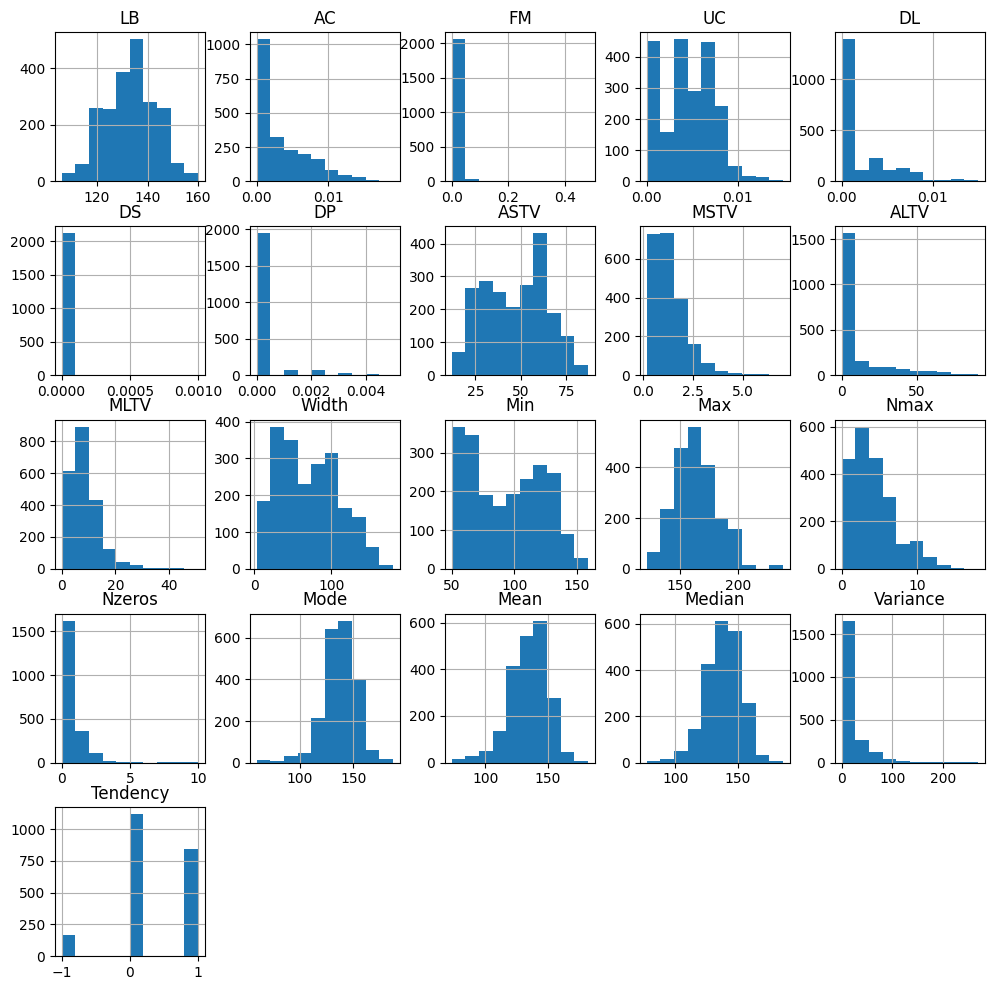

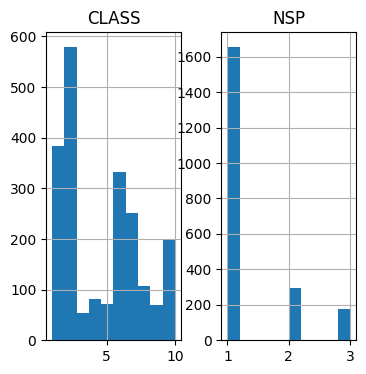

In [5]:
# Example: Plotting histograms of all numerical features
X.hist(figsize=(12, 12))
plt.show()

y.hist(figsize=(4, 4))
plt.show()


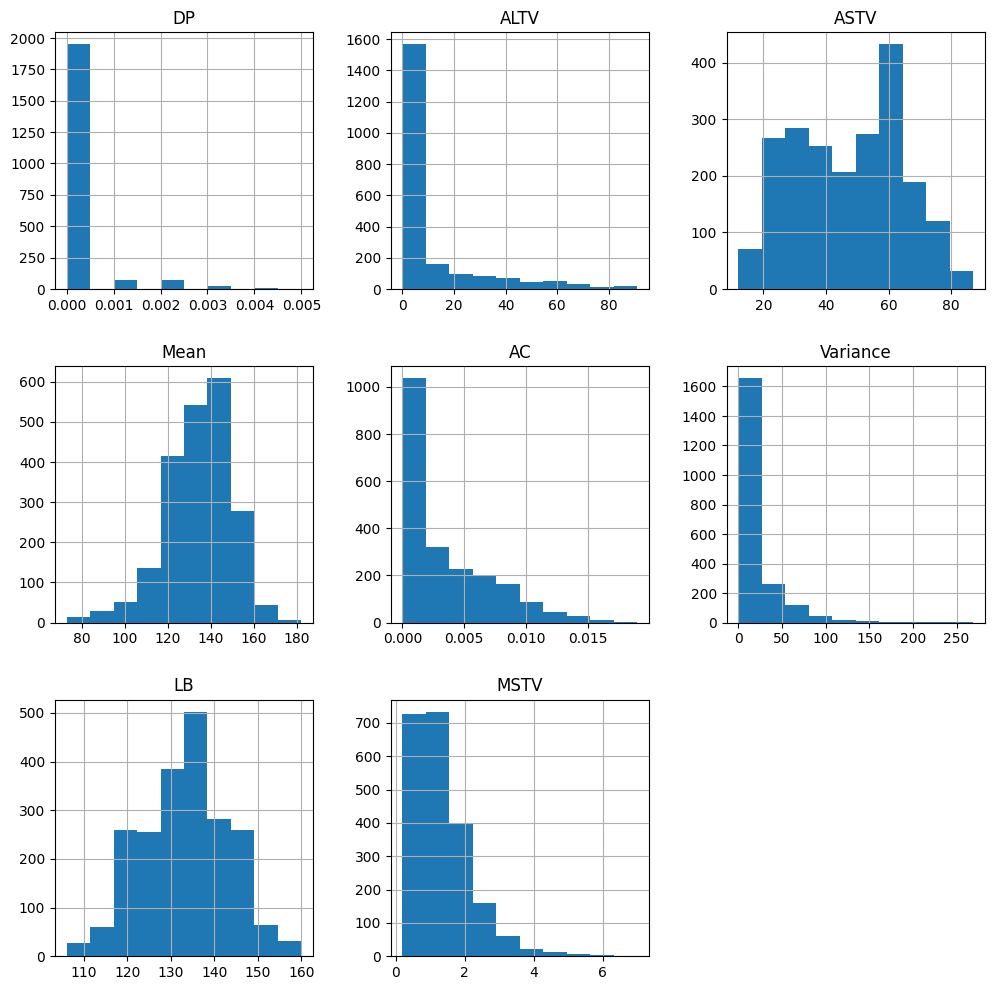

## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


<Axes: xlabel='NSP', ylabel='count'>

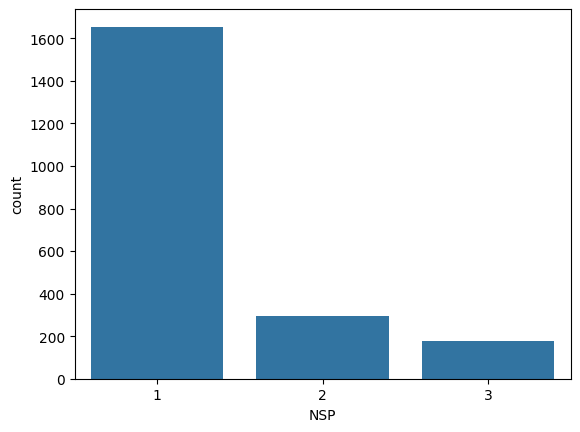

In [7]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here

#check for class imbalance
sns.countplot(x='NSP', data=y) # clear imbalance in the classes





## Feature Selection and Correlation Analysis

[Explore correlations between features and the target variable, as well as among features themselves.]


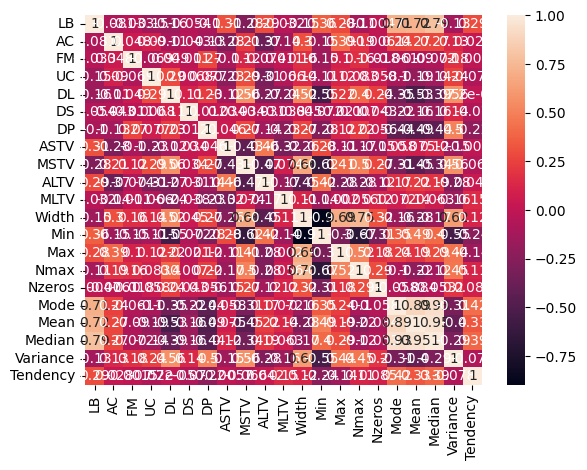

       Specs       Score
6         DP  505.853206
9       ALTV  345.156385
7       ASTV  343.820419
17      Mean  297.625497
16      Mode  275.117696
18    Median  248.772237
1         AC  196.027523
19  Variance  150.796849
0         LB  140.621076
8       MSTV  119.882006


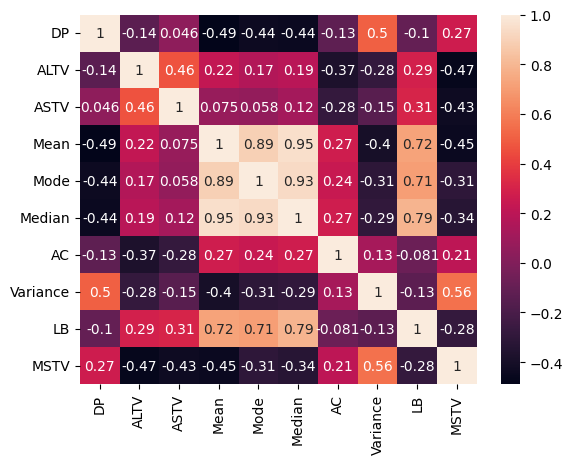

In [9]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# results in unreadable plot due to large number of features
# trying to reduce the number of features by selecting the most important ones

### Correlation of featurs with the target variable and feature selection

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#apply SelectKBest class to extract top 10 best features --> highest discriminatory power
bestfeatures = SelectKBest(score_func=f_classif, k=10)
# Use the second column of y as the target variable, i.e. the NSP column
fit = bestfeatures.fit(X, y.iloc[:, 1])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  #print 10 best features

# Select the top 10 features
X_selected = X[featureScores.nlargest(10, 'Score')['Specs']]
# selected featurs with highest discriminatory power are : DP  ALTV ASTV  Mean  Mode  Median  AC  Variance  LB  MSTV



####  correlation of the selected features

# Plot the heatmap of the top 10 features
correlation_matrix = X_selected.corr()
sns.heatmap(correlation_matrix, annot=True)

# RESULT
#  certainly better readability. only very few of the selected features are highly correlated (e.g. >0.8).
# These are : Mean, Mode and Median -->  expecteable. We should use only one of them in the model.

# Drop the Mode and Median columns form the selected features
X_selected = X_selected.drop(['Mode', 'Median'], axis=1)












## Short description of the selected features

In [43]:
# Define selected features, descriptions, and their data types
features_summary = {
    "DP": ["Prolonged decelerations", "Numerical"],
    "ALTV": ["Percentage of time with abnormal long-term variability", "Numerical"],
    "ASTV": ["Percentage of time with abnormal short-term variability", "Numerical"],
    "Mean": ["Histogram mean", "Numerical"],
    "AC": ["Accelerations (SisPorto)", "Numerical"],
    "Variance": ["Histogram variance", "Numerical"],
    "LB": ["Baseline value (SisPorto)", "Numerical"],
    "MSTV": ["Mean value of short-term variability (SisPorto)", "Numerical"]
}

# Convert to a DataFrame for better readability
features_df = pd.DataFrame(
    [(key, value[0], value[1]) for key, value in features_summary.items()],
    columns=["Feature", "Description", "Data Type"]
)

# Set pandas display options to show full width of the table
pd.set_option('display.max_colwidth', None)  # Ensure descriptions are fully visible
pd.set_option('display.width', 1000)        # Set table width for better display

# Save or display the DataFrame
print(features_df)

    Feature                                              Description  Data Type
0        DP                                  Prolonged decelerations  Numerical
1      ALTV   Percentage of time with abnormal long-term variability  Numerical
2      ASTV  Percentage of time with abnormal short-term variability  Numerical
3      Mean                                           Histogram mean  Numerical
4        AC                                 Accelerations (SisPorto)  Numerical
5  Variance                                       Histogram variance  Numerical
6        LB                                Baseline value (SisPorto)  Numerical
7      MSTV          Mean value of short-term variability (SisPorto)  Numerical


## Distributions of the selected features

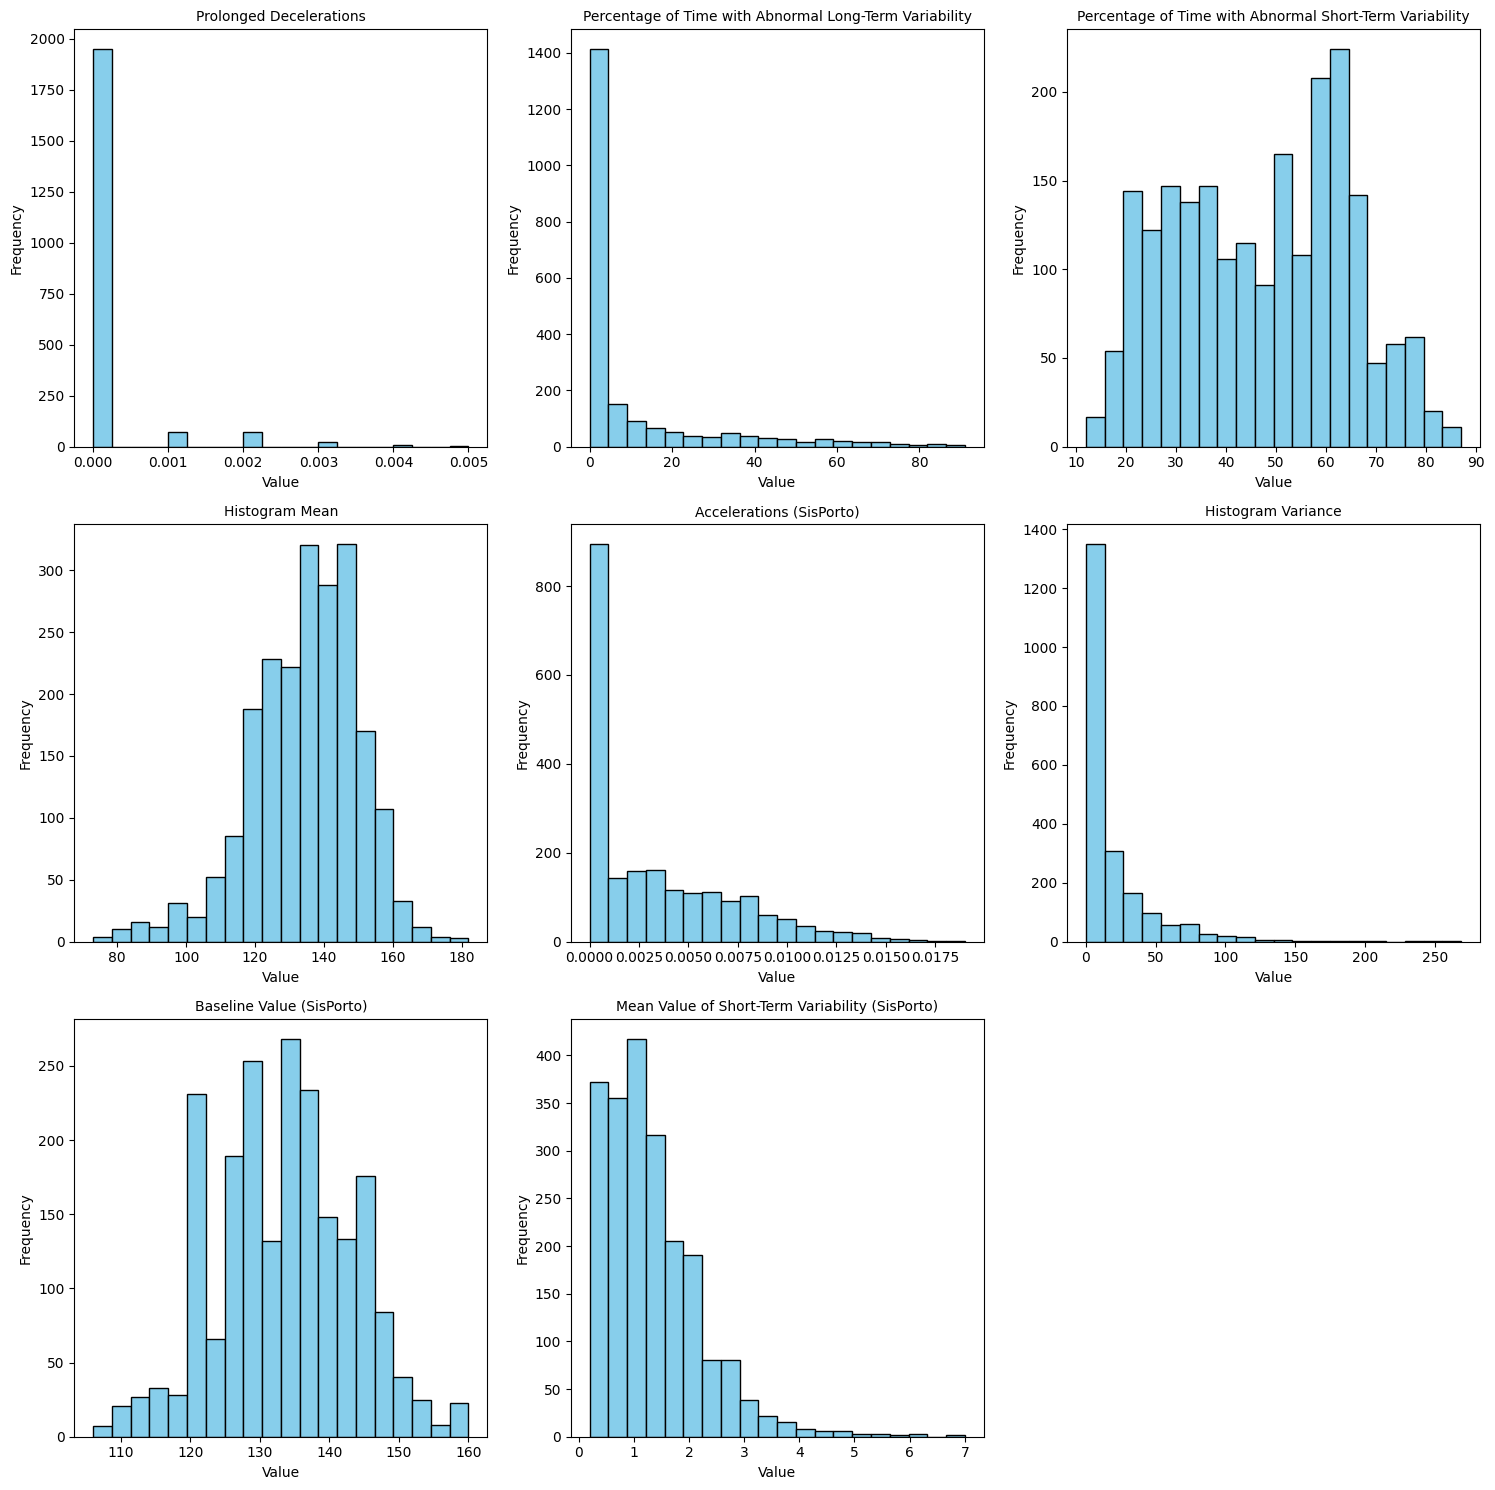

In [44]:
# Define full variable names for the selected features
feature_names = {
    "DP": "Prolonged Decelerations",
    "ALTV": "Percentage of Time with Abnormal Long-Term Variability",
    "ASTV": "Percentage of Time with Abnormal Short-Term Variability",
    "Mean": "Histogram Mean",
    "AC": "Accelerations (SisPorto)",
    "Variance": "Histogram Variance",
    "LB": "Baseline Value (SisPorto)",
    "MSTV": "Mean Value of Short-Term Variability (SisPorto)"
}

# Plot histograms with full variable names
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust layout as needed
axes = axes.ravel()  # Flatten the axes for easy iteration

for idx, column in enumerate(X_selected.columns):
    ax = axes[idx]
    ax.hist(X_selected[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(feature_names[column], fontsize=10)  # Use full name as title
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Hide unused subplots if the number of features is less than the grid size
for i in range(len(X_selected.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


# Outlier

## Outlier Detection

In this section, we analyzed outliers in the dataset using two statistical methods: the IQR (Interquartile Range) and Z-scores.

**IQR Method:**

We identified variables with symmetric distributions (e.g., Mean and LB) and calculated the lower and upper boundaries based on the IQR.
Boxplots were created to visualize these variables, marking the IQR boundaries with vertical dashed lines. Data points outside these boundaries were flagged as potential outliers.

**Z-Score Method:**

For variables with asymmetrical distributions (e.g., DP, ALTV, AC, Variance, MSTV, ASTV), Z-scores were calculated.
Scatter plots were used to visualize the Z-scores, with horizontal dashed lines marking thresholds at ±3. Data points exceeding these thresholds were considered potential outliers.
Both methods allow us to systematically identify and evaluate outliers, which can help improve the quality and reliability of further data analysis.

### IQR method and Z-Score method

In [30]:
# Function to detect outliers based on the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # First quartile (25%)
    Q3 = data.quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower boundary for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper boundary for outliers
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()  # Count of outliers
    return outliers

# Check for outliers in each feature
outlier_counts = X_selected.apply(detect_outliers_iqr)
print("Number of outliers per feature (IQR):")
print(outlier_counts)

# Calculate Z-scores for each feature
z_scores = np.abs(zscore(X_selected))  # Absolute Z-scores
outliers_zscore = (z_scores > 3).sum(axis=0)  # Count of outliers where Z > 3
print("Number of outliers per feature (Z-Score):")
print(outliers_zscore)



Number of outliers per feature (IQR):
DP          178
ALTV        309
ASTV          0
Mean         45
AC           14
Variance    184
LB            0
MSTV         70
dtype: int64
Number of outliers per feature (Z-Score):
DP          108
ALTV         59
ASTV          0
Mean         26
AC           23
Variance     44
LB            0
MSTV         33
dtype: int64


In [31]:
# Data: Number of outliers for each method
data = {
    "Feature": ["DP", "ALTV", "ASTV", "Mean", "AC", "Variance", "LB", "MSTV"],
    "Outliers (IQR)": [178, 309, 0, 45, 14, 184, 0, 70],
    "Outliers (Z-Score)": [108, 59, 0, 26, 23, 44, 0, 33],
    "Distribution": [
        "Highly skewed to the right",
        "Strongly skewed to the right",
        "Uniform distribution with peaks",
        "Symmetrical, approximately normal",
        "Strongly skewed to the right",
        "Highly skewed to the right",
        "Symmetrical and bell-shaped",
        "Right-skewed distribution"
    ]
}

# Create a DataFrame
outlier_summary = pd.DataFrame(data)

# Display the DataFrame
print(outlier_summary)

    Feature  Outliers (IQR)  Outliers (Z-Score)                       Distribution
0        DP             178                 108         Highly skewed to the right
1      ALTV             309                  59       Strongly skewed to the right
2      ASTV               0                   0    Uniform distribution with peaks
3      Mean              45                  26  Symmetrical, approximately normal
4        AC              14                  23       Strongly skewed to the right
5  Variance             184                  44         Highly skewed to the right
6        LB               0                   0        Symmetrical and bell-shaped
7      MSTV              70                  33          Right-skewed distribution


### Visualisation of outliers

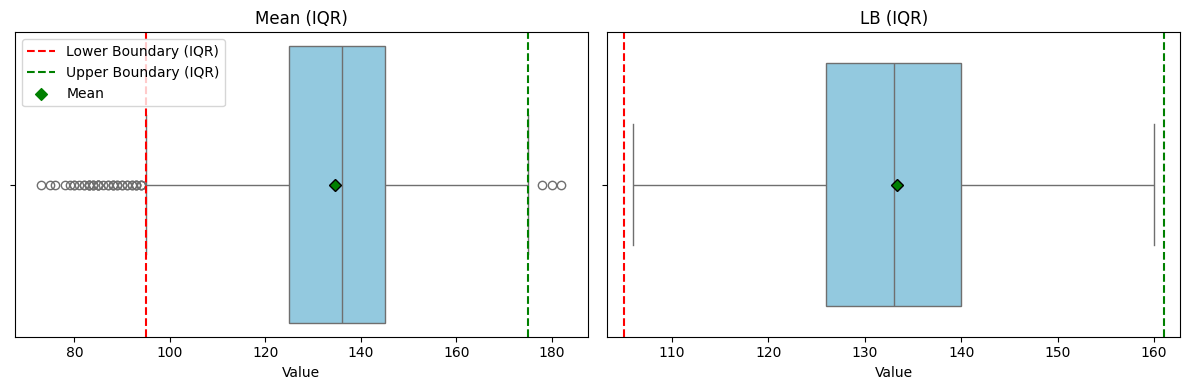

In [42]:
# Function to calculate IQR thresholds
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # First quartile (25%)
    Q3 = data.quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range (IQR)
    lower_bound = Q1 - 1.5 * IQR  # Lower boundary
    upper_bound = Q3 + 1.5 * IQR  # Upper boundary
    return lower_bound, upper_bound

# Variables with symmetric distributions suitable for IQR
suitable_for_iqr = ["Mean", "LB"]

# Create subplots
fig, axes = plt.subplots(1, len(suitable_for_iqr), figsize=(12, 4))  # Smaller, side-by-side plots

# Iterate over the columns and create a boxplot for each
for idx, column in enumerate(suitable_for_iqr):
    ax = axes[idx]  # Current axis
    lower_bound, upper_bound = detect_outliers_iqr(X_selected[column])  # Calculate IQR boundaries

    # Boxplot on the current axis
    sns.boxplot(
        x=X_selected[column],
        color="skyblue",
        showmeans=True,
        meanprops={"marker": "D", "markerfacecolor": "green", "markeredgecolor": "black"},
        ax=ax
    )

    # Mark the IQR boundaries with vertical lines
    ax.axvline(lower_bound, color="red", linestyle="--", label="Lower Boundary (IQR)")
    ax.axvline(upper_bound, color="green", linestyle="--", label="Upper Boundary (IQR)")

    # Set title and labels
    ax.set_title(f"{column} (IQR)")
    ax.set_xlabel("Value")
    ax.set_ylabel("")  # No y-axis label needed

    # Add legend only to the first plot
    if idx == 0:
        ax.scatter([], [], color="green", marker="D", label="Mean")  # Dummy point for legend
        ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


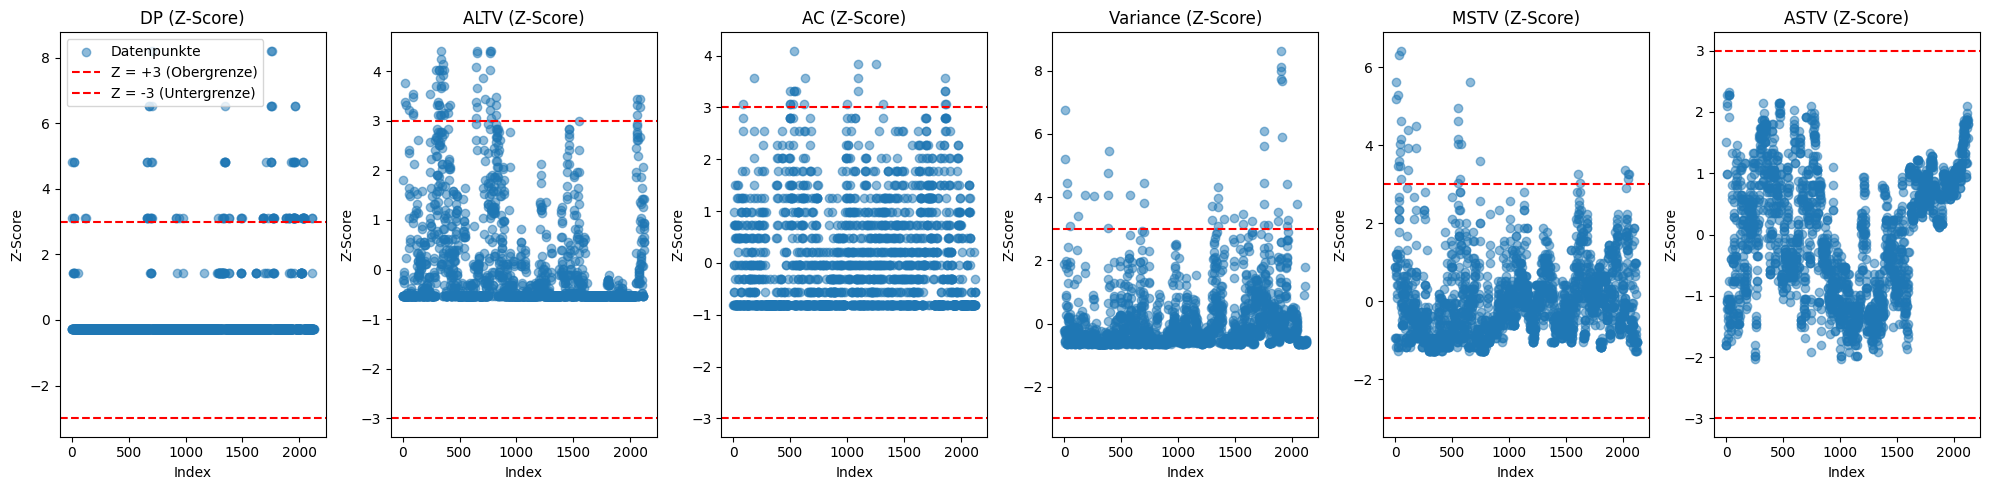

In [41]:
from scipy.stats import zscore

# Calculate Z-scores and convert to a DataFrame
z_scores = zscore(X_selected, nan_policy='omit')  # Z-scores as a NumPy array
z_scores_df = pd.DataFrame(z_scores, columns=X_selected.columns)  # Convert to DataFrame

# Variables with asymmetrical distribution
asymmetrical_features = ["DP", "ALTV", "AC", "Variance", "MSTV", "ASTV"]

# Create subplots
fig, axes = plt.subplots(1, len(asymmetrical_features), figsize=(20, 5))  # Wider layout for multiple plots

for idx, column in enumerate(asymmetrical_features):
    ax = axes[idx]  # Current axis
    feature_z_scores = z_scores_df[column]  # Z-scores for the current variable

    # Scatter plot for Z-scores
    ax.scatter(range(len(feature_z_scores)), feature_z_scores, alpha=0.5, label="Data Points")

    # Horizontal lines for Z-score thresholds
    ax.axhline(3, color="red", linestyle="--", label="Z = +3 (Upper Limit)")
    ax.axhline(-3, color="red", linestyle="--", label="Z = -3 (Lower Limit)")

    # Set title and labels
    ax.set_title(f"{column} (Z-Score)")
    ax.set_xlabel("Index")
    ax.set_ylabel("Z-Score")

    # Display legend only in the first plot
    if idx == 0:
        ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Dealing with outliers